In [1]:
from drowsiness_detection import config
import dill as pickle
config.set_paths(30, 60)
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from drowsiness_detection.data import (load_experiment_objects, load_experiment_config,
    load_experiment_search_results, load_experiment_objects_nn, load_preprocessed_train_val_test_splits_nn, session_type_mapping)
from csv import DictReader
from drowsiness_detection.visualize import plot_search_results
import tensorflow as tf
plt.rcParams["figure.figsize"] = 14, 7

In [2]:
# fixed experiment params
# EXPERIMENT_IDS = (31, 32)
EXPERIMENT_IDS = (96,)


In [3]:
exp_config, best_model, search_results, history = load_experiment_objects_nn(experiment_id=93,
                                                                             log_dir="../../logs_to_keep/")

loading from experiment with id:  93


In [4]:
# plot_search_results(search_results)

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = load_preprocessed_train_val_test_splits_nn(
        data_path=config.PATHS.WINDOW_DATA,
        exclude_sess_type=session_type_mapping[exp_config["exclude_by"]],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"],
feature_col_indices=exp_config["feature_col_indices"])

X_train = np.concatenate([X_val, X_train])
y_train = np.concatenate([y_val, y_train])

In [7]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (25642, 1800, 7), y_train shape: (25642,)
X_test shape: (6494, 1800, 7), y_test shape: (6494,)
X_val shape: (6819, 1800, 7), y_val shape: (6819,)


In [8]:
# y_pred = best_model.predict(X_test)
# np.mean(y_test == (y_pred>.5).astype(float))

In [15]:

import pandas as pd
df= pd.DataFrame.from_dict(search_results.cv_results_)
df = df[[
       'param_classifier__dropout_rate', 'param_classifier__kernel_size',
       'param_classifier__num_conv_layers', 'param_classifier__num_filters',
       'param_classifier__pooling', 'param_classifier__stride',
       'mean_test_score',
       'rank_test_score','mean_train_score']]

In [17]:
df.sort_values(by=["rank_test_score"])

,param_classifier__dropout_rate,param_classifier__kernel_size,param_classifier__num_conv_layers,param_classifier__num_filters,param_classifier__pooling,param_classifier__stride,mean_test_score,rank_test_score,mean_train_score
29,0.033476,5,4,101,average,3,0.697610,1,0.938320
17,0.263466,5,1,34,average,5,0.680305,2,0.822132
6,0.03727,5,3,34,max,3,0.666813,3,0.831164
11,0.337574,3,1,120,average,3,0.666227,4,0.797376
4,0.220265,5,3,78,max,5,0.650975,5,0.735005
26,0.064443,3,2,108,max,5,0.650242,6,0.867556
27,0.156911,5,2,99,average,5,0.642616,7,0.882856
19,0.415554,3,3,44,max,5,0.641003,8,0.669288
14,0.324743,3,2,99,average,3,0.636164,9,0.880890
3,0.406928,3,2,126,average,3,0.633231,10,0.871275


## Plot ROC Curve of best model for 10, 20 and 60 seconds data

NameError: name 'plot_roc_curve_from_log_dir' is not defined

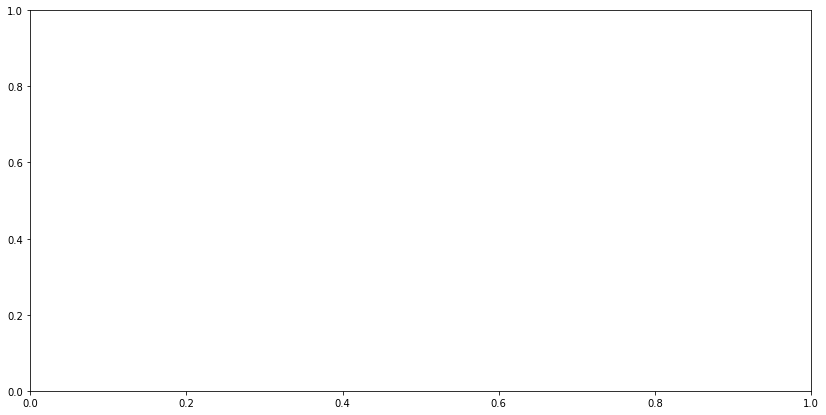

In [8]:
fig, ax = plt.subplots()

for experiment_id in EXPERIMENT_IDS:
    plot_roc_curve_from_log_dir(experiment_id=experiment_id, ax=ax, pos_label=1)

### Plot learning curve of best model for 10, 20 and 60 seconds data


In [ ]:
% load_ext autoreload
% autoreload 2

In [ ]:
plt.rcParams["figure.figsize"] = 10, 20

n_estimator_options = np.logspace(2, 9, num=10, base=2)
_, axes = plt.subplots(len(EXPERIMENT_IDS), 1)
for experiment_id, ax in zip(EXPERIMENT_IDS, axes):
    plot_learning_curve_from_log_dir(experiment_id=experiment_id,
                                     n_estimator_options=n_estimator_options, ax=ax)


### Plot classification report of best model for 10, 20 and 60 seconds data


In [ ]:
for experiment_id in EXPERIMENT_IDS:
    exp_config, best_estimator, _ = load_experiment_objects(experiment_id=experiment_id)

    window_size = exp_config["window_in_sec"]
    exp_config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test = load_preprocessed_train_test_splits(
        data_path=exp_config.PATHS.WINDOW_FEATURES,
        exclude_sess_type=session_type_mapping[exp_config["exclude_by"]],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"])

    y_hat = best_estimator.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_hat,
                                   target_names=label_names_dict[exp_config["num_targets"]])
    print(report)